In [31]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_excel('GS2.xlsx')
df.sample(3)

,Year,Question
191,2014,Do government’s schemes for up-lifting vulnera...
171,2015,The quality of higher education in India requi...
111,2018,Whether the Supreme Court Judgement (July 2018...


In [34]:
questions = df['Question'].values.tolist()
questions[:3]

['“Constitutionally guaranteed judicial independence is a prerequisite of democracy”. Comment.',
 'Who are entitled to receive free legal aid? Assess the role of the National Legal Services Authority (NALSA) in rendering free legal aid in India.',
 '“The states in India seem reluctant to empower urban local bodies both functionally as well as financially.” Comment.']

In [35]:
#PIPELINE OF BERTMODEL
# 1. EMBEDDING - BY DEFAULT USES all-MiniLM-L6-v2 SENTENCE TRANSFORMER
# 2.  

In [36]:
#USING DIFFERENT WORD EMBEDDINGS
#USING SENTENCE TRANSFORMER
"""
    The all-mpnet-base-v2 model provides superior accuracy and a deeper understanding of the context and nuances in the text.
    Given the manageable size of your dataset (200-300 questions), 
    the additional computational resources required by this model are justified by the improved performance and precision.  
    Recommendation : huggingface transformer model sentence-transformers/stsb-roberta-large is best for this with best accuracy as far as i could find,
    but requires so much computation my little laptop cannot handle.
    even this model all-mpnet-base-v2 is heavy but i can manage it. like it takes 4-5 minutes to run the model.  
"""
sentence_model = SentenceTransformer('all-mpnet-base-v2')

In [37]:
#USING FINETUNING 
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech

representation = [PartOfSpeech("en_core_web_sm"),MaximalMarginalRelevance(diversity=0.1),KeyBERTInspired(top_n_words=30)]

# model = BERTopic(embedding_model=sentence_model,representation_model=representation,verbose=True,calculate_probabilities=True, nr_topics=30, n_gram_range=(1, 3), min_topic_size=3)



In [38]:
#UPDATING C-TF-IDF
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3))

model = BERTopic(embedding_model=sentence_model,representation_model=representation,ctfidf_model=ctfidf_model,vectorizer_model=vectorizer_model,verbose=True,calculate_probabilities=True, nr_topics='auto', min_topic_size=3)

In [39]:
topics, probs = model.fit_transform(questions)

2024-07-12 17:43:07,148 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
2024-07-12 17:43:16,772 - BERTopic - Embedding - Completed ✓
2024-07-12 17:43:16,773 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-12 17:43:20,186 - BERTopic - Dimensionality - Completed ✓
2024-07-12 17:43:20,187 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-12 17:43:20,218 - BERTopic - Cluster - Completed ✓
2024-07-12 17:43:20,218 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-12 17:43:34,556 - BERTopic - Representation - Completed ✓
2024-07-12 17:43:34,557 - BERTopic - Topic reduction - Reducing number of topics
2024-07-12 17:43:50,301 - BERTopic - Topic reduction - Reduced number of topics from 13 to 13


In [40]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,26,-1_alleviation programmes india_programmes ind...,"[alleviation programmes india, programmes indi...",[“Though women in post-Independent India have ...
1,0,94,0_indian constitution_constitution discuss_ele...,"[indian constitution, constitution discuss, el...",[Discuss the essentials of the 69th Constituti...
2,1,50,1_world bank imf_india position_countries disc...,"[world bank imf, india position, countries dis...",[The proposed withdrawal of International Secu...
3,2,10,2_indian governance_local institutions india_l...,"[indian governance, local institutions india, ...",[In the absence of well – educated and organis...
4,3,7,3_primary health structure_primary health_prim...,"[primary health structure, primary health, pri...",[Professor Amartya Sen has advocated important...
5,4,6,4_self help groups_self help group_microfinanc...,"[self help groups, self help group, microfinan...",[The legitimacy and accountability of Self Hel...
6,5,6,5_india hunger poverty_india hunger_hunger ind...,"[india hunger poverty, india hunger, hunger in...",[How far do you agree with the view that the f...
7,6,5,6_reorient education india_skill employment_re...,"[reorient education india, skill employment, r...",[National Education Policy 2020 is in conformi...
8,7,5,7_pressure groups india_legislatures india pre...,"[pressure groups india, legislatures india pre...",[Pressure group politics is sometimes seen as ...
9,8,5,8_india development process_socio economic dev...,"[india development process, socio economic dev...",[The Gati-Shakti Yojana needs meticulous coord...


In [54]:
model.reduce_topics(questions,nr_topics=8)

2024-07-12 17:45:29,210 - BERTopic - Topic reduction - Reducing number of topics
2024-07-12 17:45:38,118 - BERTopic - Topic reduction - Reduced number of topics from 13 to 8


In [55]:
model.visualize_documents(questions)

In [56]:
model.visualize_topics()

In [57]:
model.visualize_barchart()

In [58]:
topics_label = model.get_topic_info()['Name'].tolist()
for i in range(len(topics_label)):
    topics_label[i] = ' '.join(topics_label[i].split('_')[1:])
topics_label

['alleviation programmes india programmes india independent india indian railways',
 'indian constitution election commission india amendment act judiciary',
 'india position global india discuss world bank imf india position',
 'policies needed particularly welfare schemes millennium development policies addressing',
 'hunger india shrinking india development process nations multidimensional poverty hunger poverty',
 'self help groups self help group microfinancing women shgs rural poor india',
 'reorient education india skill employment resource development india increasing human resources',
 'reforms civil service service strengthening democracy public service delivery reforms required civil']

In [59]:
import numpy as np
question_index = 129
topic_probabilities = probs[question_index]
significant_probs = topic_probabilities[topic_probabilities > 0.05]
significant_topics = np.arange(len(topic_probabilities))[topic_probabilities > 0.05]
others = np.sum(topic_probabilities[topic_probabilities <= 0.05])

# Labels for the pie chart
labels = [topics_label[i+1] for i in significant_topics] + ["Others"]

# Probabilities to plot
probs_to_plot = np.append(significant_probs, others)

In [60]:
probs[question_index]

array([0.03975944, 0.62607968, 0.03268891, 0.03477183, 0.03019268,
       0.03383778, 0.03574192, 0.03245525, 0.03421867, 0.03175776,
       0.03442144, 0.03407463])

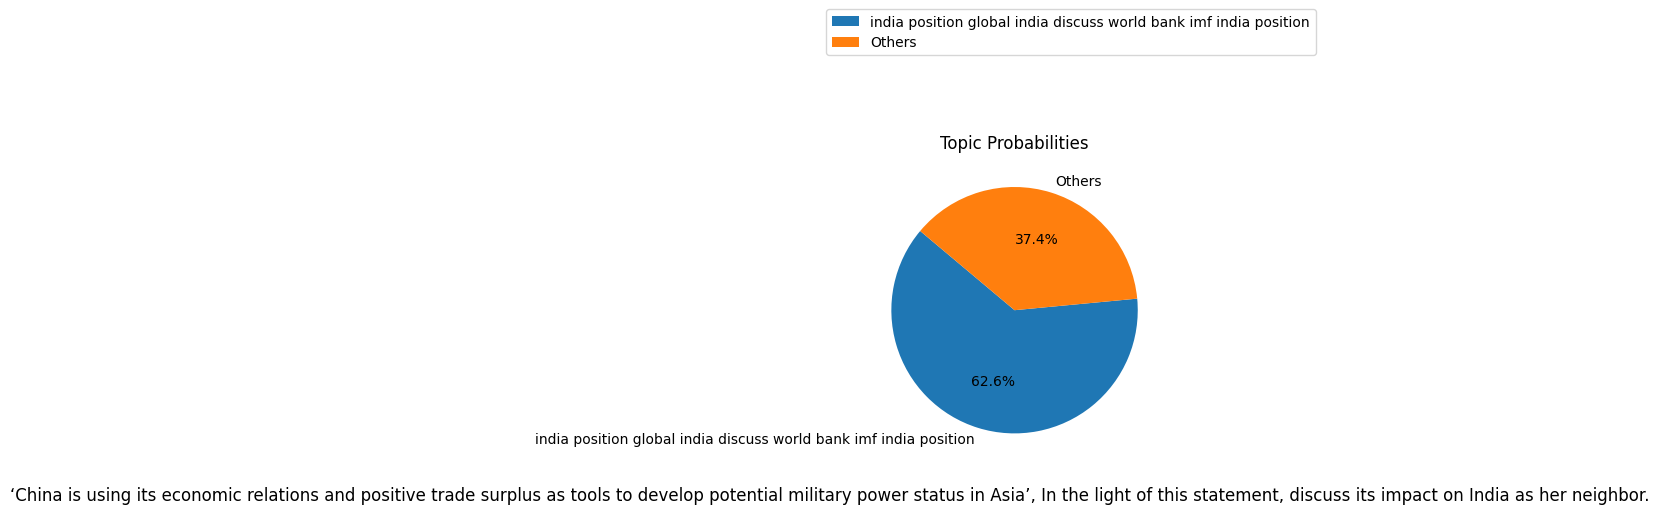

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.pie(probs_to_plot, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Topic Probabilities')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.text(-1.5, -1.5, questions[question_index], fontsize=12, ha="center", va="center")
plt.show()

In [62]:
df['Topic_Number'] = topics
df.sample(5)

,Year,Question,Topic_Number,Topic
31,2022,Discuss the procedures to decide the disputes ...,0,indian constitution constitution discuss elect...
44,2021,“Pressure groups play a vital role in influenc...,7,pressure groups india legislatures india press...
1,2023,Who are entitled to receive free legal aid? As...,0,indian constitution constitution discuss elect...
119,2018,What are the key areas of reform if the WTO ha...,1,world bank imf india position countries discus...
66,2020,“Institutional quality is a crucial driver of ...,9,reforms civil service service strengthening de...


In [63]:

df['Topic'] = df['Topic_Number'].apply(lambda x: " ".join(model.get_topic_info(topic=x)['Name'].iloc[0].split('_')[1:]))

# Display the first few rows of the DataFrame
df.head()

IndexError: single positional indexer is out-of-bounds

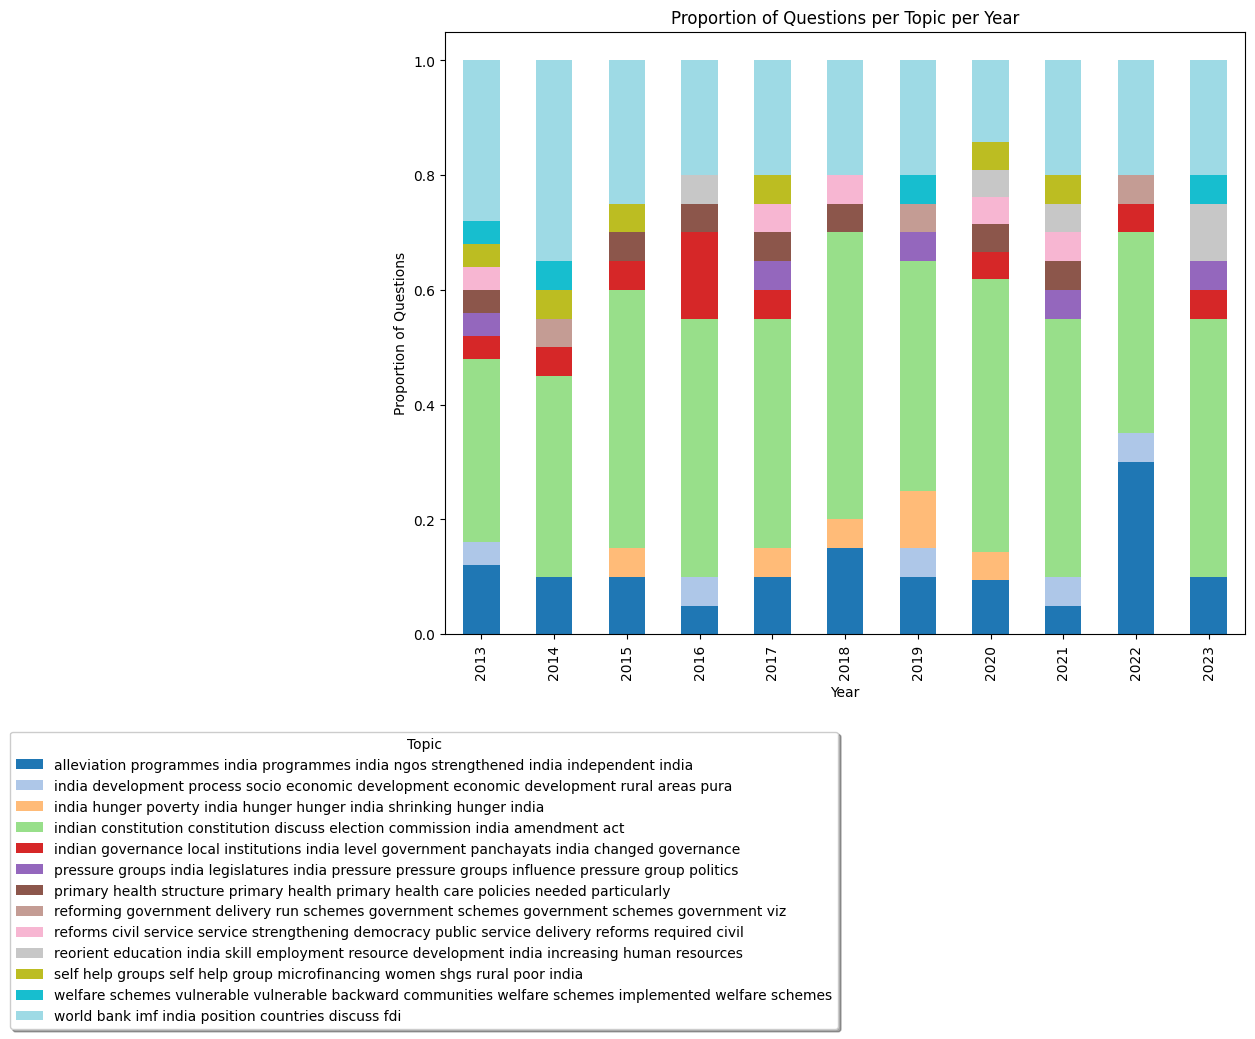

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df is your DataFrame and it now includes a 'Topic' column after categorization

# Step 2: Count questions per topic per year
topic_year_counts = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [64]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
embeddings = model._extract_embeddings(questions)
tsne = TSNE(n_components=2,random_state=42)
reduced = tsne.fit_transform(embeddings)

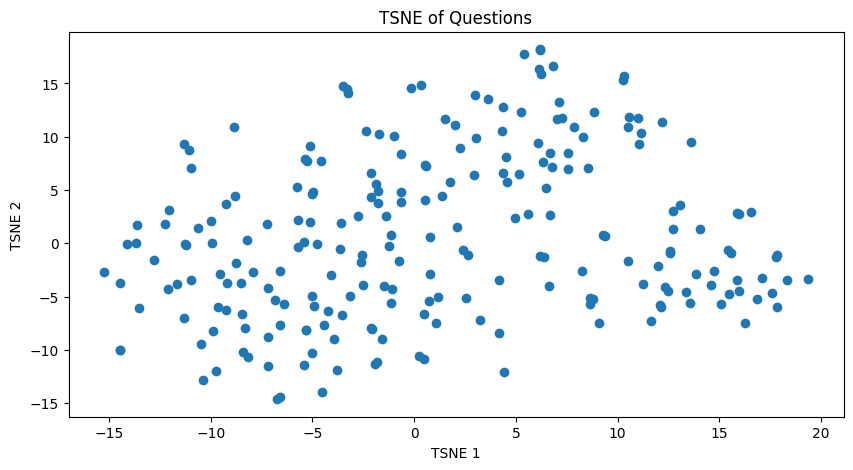

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("TSNE of Questions")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()